# Analisi Pokédex

# 1. Contesto
*Pokémon* (abbreviativo di **Pocke**t **Mon**sters) è un brand giapponese pluridecennale partorito nel 1996 dalla mente di Satoshi Taijiri. Inizialmente, fu concepito a partire dalla coppia di videogiochi sviluppati da *Game Freak* per la console Nintendo *Game Boy*, *Pokémon Versione Rossa* e *Pokémon Versione Blu* (*Versione Verde*, in Giappone), ma il successo fu tale da far scaturire una produzione di massa in tanti altri contesti (cartoni, film, carte collezionabili, gadget, peluche, alcuni anche in associazione con altre società famose) così proficua da renderlo tutt'ora il franchising più redditizio di sempre, a ventisei anni, recentemente compiuti, dalla sua nascita.

La sempre più crescente richiesta del media nel corso degli anni, ha portato Nintendo, e *The Pokémon Company* in primis (la società che detiene un terzo dei diritti intellettuali del franchise, insieme con Nintendo stessa e Game Freak) a ideare sempre più creature tascabili: se inizialmente "solo" 151 approdarono nella prima coppia di videogiochi, al momento ne esistono ben 908 (non considerando tutti i bozzetti scartati, alcuni dei quali, però, riutilizzati). Inoltre, molti di questi mostriciattoli possiedono forme alternative, che ne mutano design e caratteristiche (da non confondere con le evoluzioni, che invece ne simboleggiano una crescita, da "cucciolo" fino all'"età adulta"). Di significante interesse sono, per esempio, le forme regionali, ossia forme alternative che fanno variare le caratteristiche del Pokémon in questione, in base al suo ambientamento nell'habitat di una specifica regione.\
In base al periodo di rilascio, e in base alle coppie di videogiochi che li ospitano, i Pokémon sono inoltre suddivisi in "generazioni": ogni set generazionale è delimitato da tre starter (e le loro forme evolute), ossia i Pokémon con i quali si inizia tipicamente la partita, e un numero variabile di "leggendari", ossia la specie più rara e potente presente nella fauna del rispettivo gioco; al momento, si è giunti all'ottava generazione e si è in attesa della nona, in concomitanza con l'uscita dei titoli *Pokémon Scarlatto* e *Pokémon Violetto*, verso la fine del 2022.

La serie di videogiochi si basa sul concetto di collezionare tutti i mostriciattoli tascabili – da qui lo slogan ufficiale del brand *Gotta catch 'em all!* (*Acchiappali tutti!*, in italiano) – allevarli, e diventare il Campione della Lega Pokémon della regione d'ambientazione del rispettivo videogioco, onorificienza data a quell'allevatore di Pokémon – o Allenatore, utilizzando il gergo del videogioco – che insieme alla squadra è riuscito a superare ostacoli sempre più difficili e allenatori via via sempre più forti, secondo un'idea ispirata dall'ultimo film con protagonista Bruce Lee: "*L'ultimo combattimento di Chen*".

Ogni Pokémon è caratterizzato da:
- uno o due tipi: evidenziano l'affinità del singolo Pokémon con un certo "elemento" naturale; in particolare, i 18 tipi possibili sono: Normale, Erba, Fuoco, Acqua, Elettro, Volante, Coleottero, Roccia, Terra, Acciaio, Ghiaccio, Lotta, Psico, Buio, Veleno, Spettro, Drago, Folletto;
- natura: evidenziano il carattere del Pokémon, garantendo bonus e malus sulle sue statistiche;
- quattro possibili attacchi suddivisi nei tipi precedentemente citati: l'affinità tra tipo dell'attacco e uno dei tipi del Pokémon garantisce un bonus nell'output di danno noto come *same-type attack bonus* (**STAB**);
- abilità: effetto latente secondario del Pokémon, indipendente dagli attacchi.
- sesso: maschile, femminile o asessuato; ogni Pokémon ha una certa probabilità di ritrovamento in base al sesso, se non asessuato.
- cinque statistiche: punti vita – o *Health Points* (**HP**) –, attacco, difesa, attacco speciale, difesa speciale, velocità.
- tasso di cattura: ogni Pokémon ha una certa probabilità di essere catturato, dipendente dalla sua rarità, dai suoi punti vita correnti (rispetto al totale) e da una serie di altre variabili che verranno investigate nel corso dell'analisi.

Inoltre, durante ogni battaglia, un Pokémon guadagna dei punti esperienza che, facendolo salire di livello (in un intervallo che va da 1 a 100), permettono l'incremento delle sue statistiche, l'apprendimento di nuovi attacchi e l'evoluzione in una nuova specie. 

In ogni videogioco, l'insieme di tutti i Pokémon (comprendente descrizioni sul loro comportamento e caratteristiche generali) è raccolto in un dispositivo chiamato Pokédex (abbreviativo di **Poké**mon ed In**dex**).\
Quella che si vuole fornire è una sorta di alternativa al Pokédex.

# 2. Richieste ed obiettivi (WIP)
1. Ricercare il tipo più comune.
2. Studiare le statistiche d'attacco dei Pokémon in base al loro tipo e al sesso.
3. Studiare le probabilità di ritrovamento di un Pokémon in un determinato sesso in base alla sua specie.
4. Confrontare le compatibilità e le incompatibilità tra i tipi, gli effetti delle mosse e le abilità.
5. Applicare la regressione sulle statistiche di attacco.
6. Verificare l'efficacia della classificazione. 


# 3. Raccolta dati
Per effettuare quest'analisi è stato utilizzato il dataset "Complete Pokemon Data Set", mantenuto e aggiornato da Kyle Kohnen fino al 8/12/2021, raggiungibile al seguente link: https://www.kaggle.com/kylekohnen/complete-pokemon-data-set/version/5.

Esso contiene tutti i Pokémon fino all'ottava generazione (escludendo quelli rilasciati nel più recente *Leggende Pokémon: Arceus*), e comprende tutte le forme alternative e regionali.


# 4. Esplorazione dei dati

In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

pokedex = pd.read_csv("pokemon.csv")

In [20]:
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           1118 non-null   object 
 1   pokedex_number                 1118 non-null   int64  
 2   abilities                      1118 non-null   object 
 3   typing                         1118 non-null   object 
 4   hp                             1118 non-null   int64  
 5   attack                         1118 non-null   int64  
 6   defense                        1118 non-null   int64  
 7   special_attack                 1118 non-null   int64  
 8   special_defense                1118 non-null   int64  
 9   speed                          1118 non-null   int64  
 10  height                         1118 non-null   int64  
 11  weight                         1118 non-null   int64  
 12  genus                          1118 non-null   o

Il dataset è molto variegato, e le sue colonne (ben 49) comprendono sia valori numerici (di diverso tipo), sia booleani e categoriali.

Di seguito, si mostrano primi cinque record per intero.

In [21]:
pokedex.head()

,name,pokedex_number,abilities,typing,hp,attack,defense,special_attack,special_defense,speed,...,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness
0,Bulbasaur,1,Overgrow~Chlorophyll,Grass~Poison,45,49,49,65,65,45,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,2,Overgrow~Chlorophyll,Grass~Poison,60,62,63,80,80,60,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,Venusaur Gmax,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,Venusaur Mega,3,Thick Fat,Grass~Poison,80,100,123,122,120,80,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5


## 4.1 Manipolazione del dataset
Poiché la forma alternativa del singolo Pokémon, quando presente, è specificata direttamente nel suo nome, è possibile rimuovere le due colonne "is_default" e "switchable_form" in quanto ridondanti.\
È possibile inoltre rimuovere la colonna "genus", che indica una breve descrizione del Pokémon (spesso unica per ogni famiglia evolutiva), e che risulta essere poco utile ai fini della nostra analisi.\
Avendo a disposizione i tipi, inoltre, è possibile eliminare la colonna "number_pokemon_with_typing", la quale per ogni record indica il numero di Pokémon con lo stesso tipo (record preso in esame incluso).

In [22]:
pokedex = pokedex.drop(["is_default", "forms_switchable", "genus", "number_pokemon_with_typing"], axis=1)

Poiché molti Pokémon vantano la presenza di un doppio tipo, per praticità si sceglie di separare la colonna "typing" in due colonne "typing1" e "typing2". Da notare il fatto che, nell'attuale colonna, le stringhe sono separate dal carattere "tilde" (~), caratteristica che potrà essere sfruttata per creare un'opportuna funzione di separazione.

In [23]:
pokedex[['typing1', 'typing2']] = pokedex.typing.str.split('~', expand=True)
typing2 = pokedex.pop('typing2')
typing1 = pokedex.pop('typing1')
pokedex.insert(3,"typing1", typing1)
pokedex.insert(4,"typing2", typing2)

pokedex = pokedex.drop(["typing"], axis=1)

## 4.2 Distribuzione dei dati
Di seguito si visualizzano le informazioni del dataset e i suoi primi cinque record, dopo la sua manipolazione.

In [27]:
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           1118 non-null   object 
 1   pokedex_number                 1118 non-null   int64  
 2   abilities                      1118 non-null   object 
 3   typing1                        1118 non-null   object 
 4   typing2                        597 non-null    object 
 5   hp                             1118 non-null   int64  
 6   attack                         1118 non-null   int64  
 7   defense                        1118 non-null   int64  
 8   special_attack                 1118 non-null   int64  
 9   special_defense                1118 non-null   int64  
 10  speed                          1118 non-null   int64  
 11  height                         1118 non-null   int64  
 12  weight                         1118 non-null   i

In [26]:
pokedex.head()

,name,pokedex_number,abilities,typing1,typing2,hp,attack,defense,special_attack,special_defense,...,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness
0,Bulbasaur,1,Overgrow~Chlorophyll,Grass,Poison,45,49,49,65,65,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,2,Overgrow~Chlorophyll,Grass,Poison,60,62,63,80,80,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,3,Overgrow~Chlorophyll,Grass,Poison,80,82,83,100,100,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,Venusaur Gmax,3,Overgrow~Chlorophyll,Grass,Poison,80,82,83,100,100,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,Venusaur Mega,3,Thick Fat,Grass,Poison,80,100,123,122,120,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5


Esso conta 1118 record. Si notino i conteggi relativi alle colonne "typing2" e "evolves_from": sebbene siano di meno, non deve considerarsi un errore, bensì come un aspetto da non trascurare; infatti non tutti i Pokémon presentano un doppio tipo, e non tutti i Pokémon sono in grado di evolversi. 

In [37]:
dex_type = pokedex["typing1"].value_counts() + pokedex["typing2"].value_counts()
dex_type

Bug          96
Dark         76
Dragon       78
Electric     89
Fairy        72
Fighting     78
Fire         88
Flying      135
Ghost        73
Grass       124
Ground       82
Ice          58
Normal      130
Poison       85
Psychic     123
Rock         89
Steel        77
Water       162
dtype: int64

<AxesSubplot:>

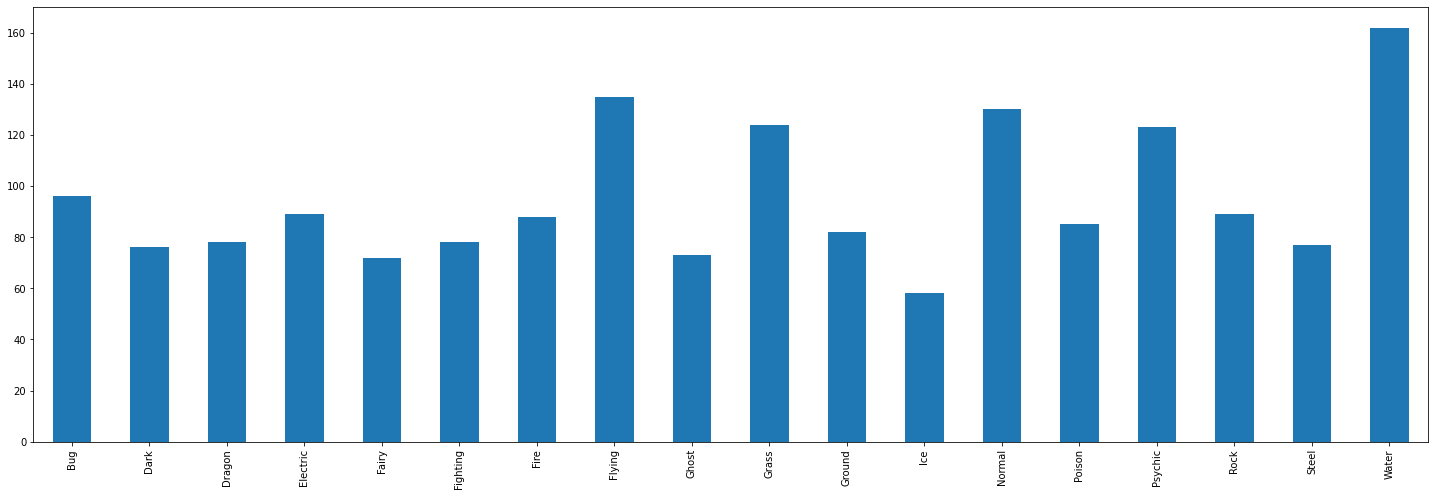

In [34]:
dex_type.plot.bar(figsize=(25,8))

Visto che alcuni Pokémon, cambiando forma, cambiano anche uno dei due tipi, nel conteggio vengono considerate anche le eventuali forme alternative: quello più comune, è il tipo Acqua.